<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Project_7 - RetailShop (Customer Segmentation)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Problem Statement

This dataset is created for to segregate the regular customer to improvise our advertisement stratergy by Indian walmarts. The dataset contains various features that are Capture during the selling and buying sratergy in walmarts. The predicted output obtained from the above algorithm gives a fair idea about the who are the loyal customers.

# Data Dictionary 
 
 The Data set contains 541909 observations of transaction From Different walmart shops. Corresponding to each we have to identiy the loyal customers.

## About the dataset (Online Retails data) 

**InvoiceNo:** Invoice Number for each onine Trasaction 

**StockCode:** Stock code for products

**Description:** Discription about the Product

**Quantity:** Net quantity of product taken by cuatomer

**InvoiceDate:** Invoice creation Date

**UnitPrice:** Unit Price of the Product

**CustomerID:** Customer ID

**Country:** country of Customer Belongs 


In [1]:
# Import Libraries

# Import Numpy
import numpy as np

# Import Pandas
import pandas as pd

# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Import Seaborn 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# Import the Date Time Library
import datetime as dt

In [2]:
# Read The Datset "Online Retail"
# The DatFile sometime wont readable due to its containt for encoding do "encoding = ISO-8859-1"
# Use Panda Library To read The CSV file
# .head() helps to read top 5 record of dataset
df = pd.read_csv("Online Retail.csv",sep=",",encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.550000,17850.000000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.390000,17850.000000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.750000,17850.000000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.390000,17850.000000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.390000,17850.000000,United Kingdom


In [3]:
# Take Information about the data
# Check the datatype
# Check For count of observations
# .info() helps you to understand the structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Inference-----1)As we see here Invoice Date is in "object" but it shuld be in date foremate so coverte it,
2) as we see there are some missing values


In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
# Describe the data
# Describe give you all inside about the data
# Like count	unique	top	freq	first	last	mean	std	min	25%	50%	75%	max
# .describe () is the code
# .T use to transpose the dataframe
df.describe(include="all").T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.000000,NaN,NaN,NaN,NaT,NaT,9.552250,218.081158,-80995.000000,1.000000,3.000000,10.000000,80995.000000
InvoiceDate,541909,23260,2011-10-31 14:41:00,1114,2010-01-12 08:26:00,2011-12-10 17:19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909.000000,NaN,NaN,NaN,NaT,NaT,4.611114,96.759853,-11062.060000,1.250000,2.080000,4.130000,38970.000000
CustomerID,406829.000000,NaN,NaN,NaN,NaT,NaT,15287.690570,1713.600303,12346.000000,13953.000000,15152.000000,16791.000000,18287.000000
Country,541909,38,United Kingdom,495478,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# As wee see some custemer ids are missing and Descriptonn is also missing
# Conform the same
# .isnull helps you to identify the null values
# its output is in booliean so for count we use .sum()
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# As we see here Customer ids are missing
# This is our identification feature so if its missing means other wont help us in analysis
# Drop that all missing datapoints

In [8]:
# inplace = True haelps to make canges in orignal data as well
df.dropna(inplace=True)

In [9]:
# Now check the shape of the data
df.shape
# So we have 8 featurs and 406829 datapoints

(406829, 8)

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.550000,17850.000000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.390000,17850.000000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.750000,17850.000000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.390000,17850.000000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.390000,17850.000000,United Kingdom


In [11]:
# As we see here our data is so simple and the it wont showcase our target onces

In [12]:
# Basically during Customer Segmenhtation we have to understand some methodologies
# RFM  (R=Recensy<How much recently customer comes to the company,
# F=Frequency<How much time ustomer comes to the shop
# M=Monitory<How much he spent to buying the product),
# So we have to do feature engineering on this featurs

In [13]:
# Recency = Last Date-Last Invoice Date
# Frequency = Count of invoice Number of transaction
# Monetary = Sum of total

In [14]:
# Date time to calculate Recency
Latest_Date = dt.datetime(2021,2,18)

# Create RFM modeling Score for each Customer
RFMScores = df.groupby("CustomerID").agg({"InvoiceDate": lambda x: (Latest_Date - x.max()).days,"InvoiceNo": lambda x: len(x),"UnitPrice": lambda x: x.sum()})

# Covert the Invoice date into type int
RFMScores['InvoiceDate'] = RFMScores["InvoiceDate"].astype(int)

# Rename the column name to Recency, Frequency and Monetory
RFMScores.rename(columns = {"InvoiceDate":"Recency",
                           "InvoiceNo":"Frequency",
                           "UnitPrice":"Monetary"})

RFMScores.reset_index().head()

,CustomerID,InvoiceDate,InvoiceNo,UnitPrice
0,12346.000000,3683,2,2.080000
1,12347.000000,3397,182,481.210000
2,12348.000000,3433,31,178.710000
3,12349.000000,3376,73,605.100000
4,12350.000000,3668,17,65.300000


In [15]:
RFMScores = RFMScores.rename(columns = {"InvoiceDate":"Recency",
                           "InvoiceNo":"Frequency",
                           "UnitPrice":"Monetary"})
RFMScores.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.000000,3683,2,2.080000
12347.000000,3397,182,481.210000
12348.000000,3433,31,178.710000
12349.000000,3376,73,605.100000
12350.000000,3668,17,65.300000


In [16]:
# Descriptive Statistics (Recency)
RFMScores.Recency.describe()

count   4372.000000
mean    3457.987420
std      113.931649
min     3357.000000
25%     3377.000000
50%     3414.000000
75%     3509.000000
max     4054.000000
Name: Recency, dtype: float64

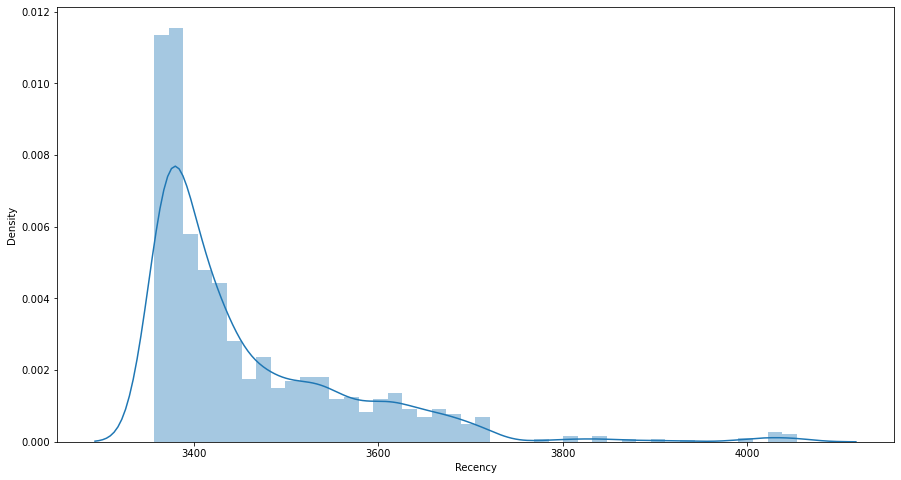

In [17]:
# Recency Distribtion plot
sns.distplot(RFMScores.Recency)
plt.show()

In [18]:
# Data is rigth skewed sa we see in digram

In [19]:
# Descriptive satatics for (Frequency)
RFMScores.Frequency.describe()

count   4372.000000
mean      93.053294
std      232.471608
min        1.000000
25%       17.000000
50%       42.000000
75%      102.000000
max     7983.000000
Name: Frequency, dtype: float64

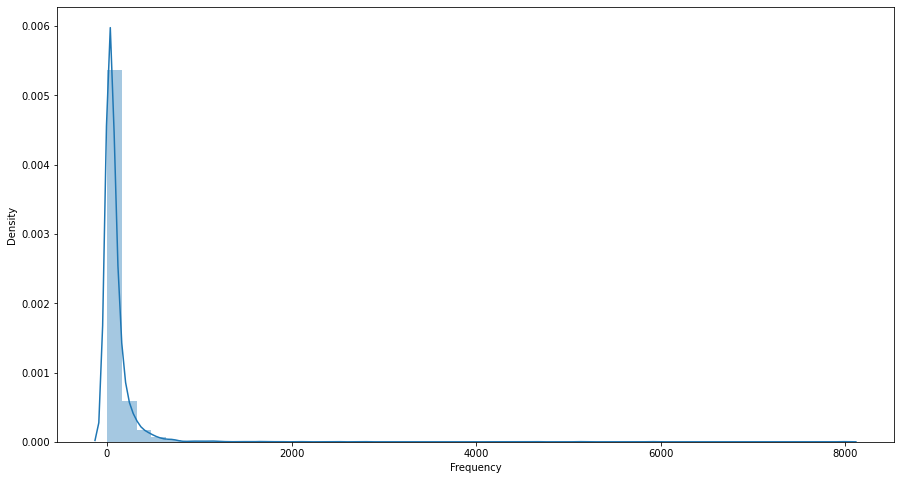

In [20]:
# Plot for Frequency
sns.distplot(RFMScores.Frequency)
plt.show()

In [21]:
# as we see this data is also right skewed

In [22]:
# Descriptive Statistics for Monetary
RFMScores.Monetary.describe()

count    4372.000000
mean      322.008226
std      1284.783098
min         0.000000
25%        52.865000
50%       130.095000
75%       302.332500
max     41376.330000
Name: Monetary, dtype: float64

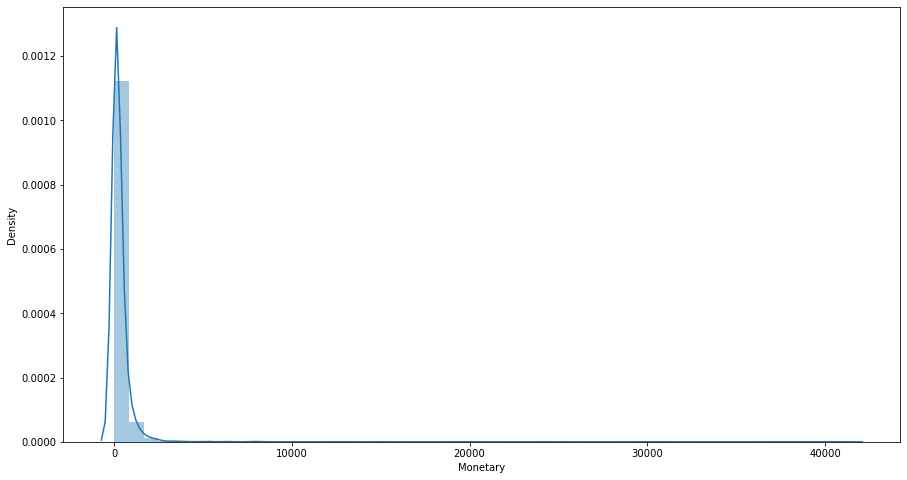

In [23]:
# Plot the Monetary
sns.distplot(RFMScores.Monetary)
plt.show()

In [24]:
# As we see here all our datapoints re right skewed so lets do further analysis

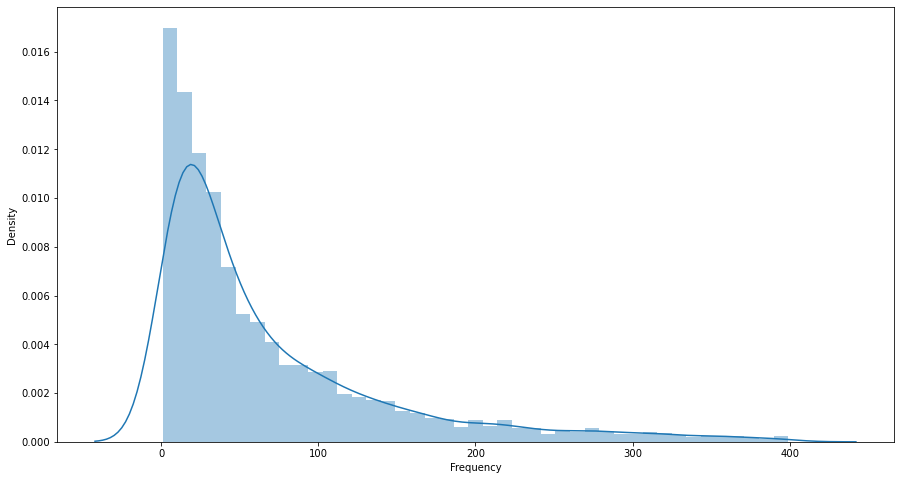

In [25]:
x = RFMScores.query("Frequency < 400")['Frequency']
sns.distplot(x)
plt.show()

In [26]:
# Split the data into four segment using Quantile
quantile = RFMScores.quantile(q = [0.25,0.50,0.75])
quantile = quantile.to_dict()

In [27]:
quantile

{'Recency': {0.25: 3377.0, 0.5: 3414.0, 0.75: 3509.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 102.0},
 'Monetary': {0.25: 52.86500000000001, 0.5: 130.095, 0.75: 302.3325}}

In [28]:
# Function to create R,F, and M Segment
def RScoring(x,p,d):
    if x<= d[p][0.25]:
        return 1
    elif x <=d[p][0.50]:
        return 2
    elif x<= d[p][0.75]:
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x<= d[p][0.25]:
        return 4
    elif x <=d[p][0.50]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else:
        return 1

In [29]:
# Calculate Add R,F and M segments values columns in the existing dataset to show R,F,M segment values
RFMScores["R"] = RFMScores['Recency'].apply(RScoring,args=('Recency',quantile,))
RFMScores["F"] = RFMScores['Frequency'].apply(FnMScoring,args=('Frequency',quantile,))
RFMScores["M"] = RFMScores['Monetary'].apply(FnMScoring,args=('Monetary',quantile,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.000000,3683,2,2.080000,4,4,4
12347.000000,3397,182,481.210000,2,1,1
12348.000000,3433,31,178.710000,3,3,2
12349.000000,3376,73,605.100000,1,2,1
12350.000000,3668,17,65.300000,4,4,3


In [30]:
# Calculate and add RFMGroup values column showing Combine coonected score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str)+RFMScores.F.map(str)+RFMScores.M.map(str)

# Calculate and add RFM Score value column  showing total sum of RFM group Values
RFMScores['RFMScore'] = RFMScores[['R','F','M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.000000,3683,2,2.080000,4,4,4,444,12
12347.000000,3397,182,481.210000,2,1,1,211,4
12348.000000,3433,31,178.710000,3,3,2,332,8
12349.000000,3376,73,605.100000,1,2,1,121,4
12350.000000,3668,17,65.300000,4,4,3,443,11


In [31]:
# Assign Loyelty Level to each customer
Loyalty_Level = ['Platinaum','Gold','Silver','Bronz']

Score_cut = pd.qcut(RFMScores.RFMScore,q = 4,labels=Loyalty_Level)
RFMScores['RFM_Loyelty_Level'] = Score_cut.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyelty_Level
0,12346.000000,3683,2,2.080000,4,4,4,444,12,Bronz
1,12347.000000,3397,182,481.210000,2,1,1,211,4,Platinaum
2,12348.000000,3433,31,178.710000,3,3,2,332,8,Gold
3,12349.000000,3376,73,605.100000,1,2,1,121,4,Platinaum
4,12350.000000,3668,17,65.300000,4,4,3,443,11,Bronz


In [32]:
# Validate the data For RFM group = 111
RFMScores[RFMScores['RFMGroup'] == '111'].sort_values("Monetary",ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyelty_Level
0,14096.000000,3369,5128,41376.330000,1,1,1,111,3,Platinaum
1,14911.000000,3357,5903,31060.660000,1,1,1,111,3,Platinaum
2,17841.000000,3357,7983,20333.180000,1,1,1,111,3,Platinaum
3,12748.000000,3362,4642,15115.600000,1,1,1,111,3,Platinaum
4,12757.000000,3362,377,8035.240000,1,1,1,111,3,Platinaum
5,14606.000000,3362,2782,7839.020000,1,1,1,111,3,Platinaum
6,15502.000000,3373,252,7836.840000,1,1,1,111,3,Platinaum
7,14156.000000,3357,1420,6544.290000,1,1,1,111,3,Platinaum
8,15311.000000,3357,2491,6267.750000,1,1,1,111,3,Platinaum
9,14527.000000,3358,1011,5996.640000,1,1,1,111,3,Platinaum


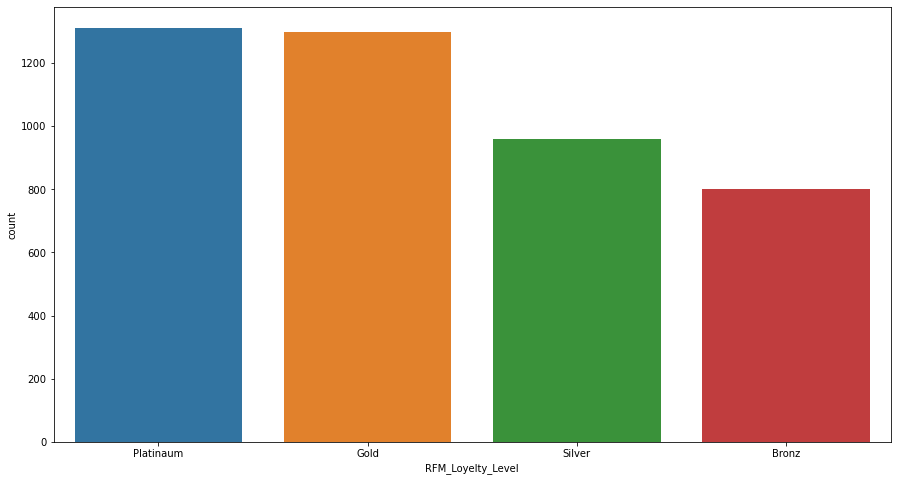

In [33]:
# Plot the loyelty level
sns.countplot(RFMScores.RFM_Loyelty_Level)
plt.show()

 ### As we see here maximum customer are belongs to the Platanum level meance we have to sagrigate and promote the ork to them

## Folowing table contains our target peoples

In [34]:
RFMScores[RFMScores['RFM_Loyelty_Level'] == 'Platinaum'].sort_values("Monetary",ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyelty_Level
0,14096.000000,3369,5128,41376.330000,1,1,1,111,3,Platinaum
1,14911.000000,3357,5903,31060.660000,1,1,1,111,3,Platinaum
2,12744.000000,3409,229,25108.890000,2,1,1,211,4,Platinaum
3,16029.000000,3387,274,24111.140000,2,1,1,211,4,Platinaum
4,17841.000000,3357,7983,20333.180000,1,1,1,111,3,Platinaum
5,12748.000000,3362,4642,15115.600000,1,1,1,111,3,Platinaum
6,12536.000000,3387,273,13255.220000,2,1,1,211,4,Platinaum
7,12757.000000,3362,377,8035.240000,1,1,1,111,3,Platinaum
8,14606.000000,3362,2782,7839.020000,1,1,1,111,3,Platinaum
9,15502.000000,3373,252,7836.840000,1,1,1,111,3,Platinaum


<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Customer Segmentation (End) <End>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## "END" New learning Begins lets explore other model and see what are there Responces